In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edoxrd as xrd
from ipywidgets import interact, fixed, FloatSlider

%matplotlib inline
%config InlineBackend.figure_formats = set(['retina'])

In [192]:
sample = 'e16095'
d = '"C:\Users\zatterin\OneDrive - University College London\OneDrive Synced Docs\phd\data\XRD\"\\' + sample + '"\DteX"'

In [200]:
# # Linux/Mac OS
# _103 = !ls {d} | grep '103' | grep asc
# _104 = !ls {d} | grep '104' | grep asc
# _002 = !ls {d} | grep '002' | grep asc
# Windows
_103 = !dir {d} | find "103" | find "asc"
_104 = !dir {d} | find "104" | find "asc"
_002 = !dir {d} | find "002" | find "asc"
for fname in _103: print fname # Each list contains Sub and Film files.
for fname in _104: print fname
for fname in _002: print fname

19/10/2016  22:00           714,900 e16095_01_-103_KTO_RSM_2-Theta.asc
20/10/2016  04:10         1,175,362 e16095_02_-103_PTO_RSM_2-Theta.asc
20/10/2016  06:17           572,301 e16095_03_-104_KTO_RSM_2-Theta.asc
20/10/2016  13:56         1,234,750 e16095_04_-104_PTO_RSM_2-Theta.asc
22/10/2016  05:10         2,148,299 e16095_05_002_KTO_RSM_2-Theta.asc
22/10/2016  16:38         2,291,674 e16095_06_002_PTO_RSM_2-Theta.asc


## Plot RSMs

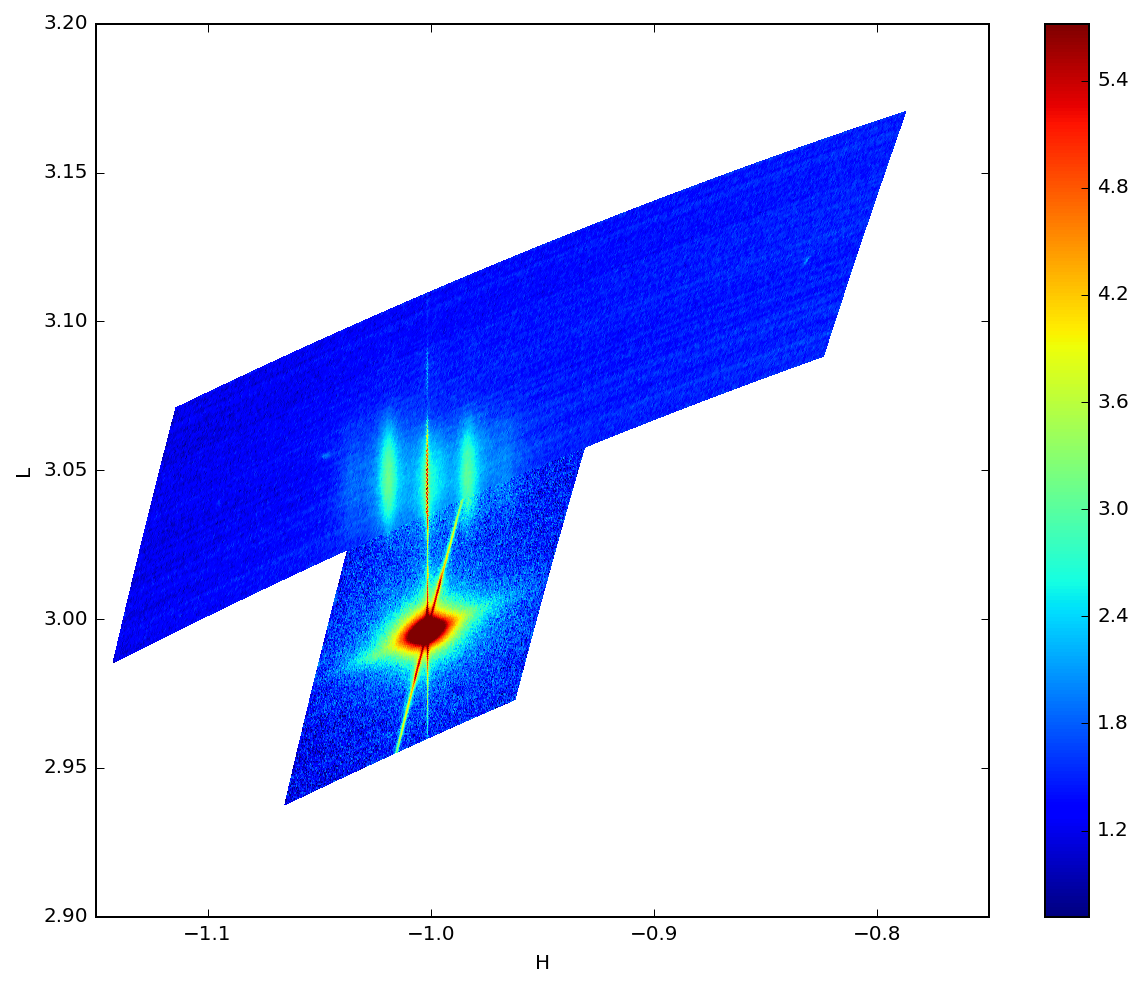

In [13]:
fig = plt.figure(figsize=(10,8))
xrd.plt_rsm(_103[4],_103[5],d,'sub')

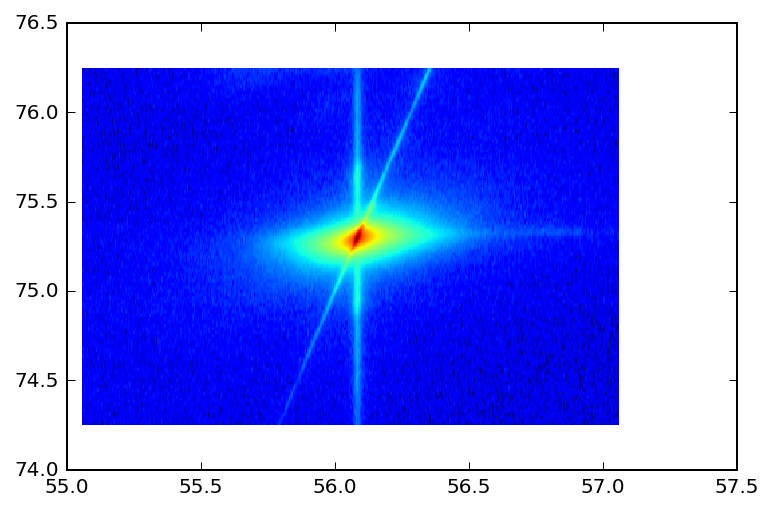

In [19]:
tt,om,i=xrd.read_rsm_data(_103[0],d,coordinates='ttomega')
plt.pcolormesh(om, tt ,i);

In [20]:
tt[i==i.max()], om[i==i.max()]

(array([ 75.303]), array([ 56.085]))

### Compare 

In [7]:
sample2 = 'e16020'
d2 = "/Users/ezatterin/Documents/UCL_phd/data/XRD/"+sample2+"/DteX/"
_103_2 = !ls {d2} | grep '103' | grep asc
for fname in _103_2: print fname

e16020_01_-103_KTO_RSM_2-Theta.asc
e16020_02_-103_PTO_RSM_2-Theta.asc


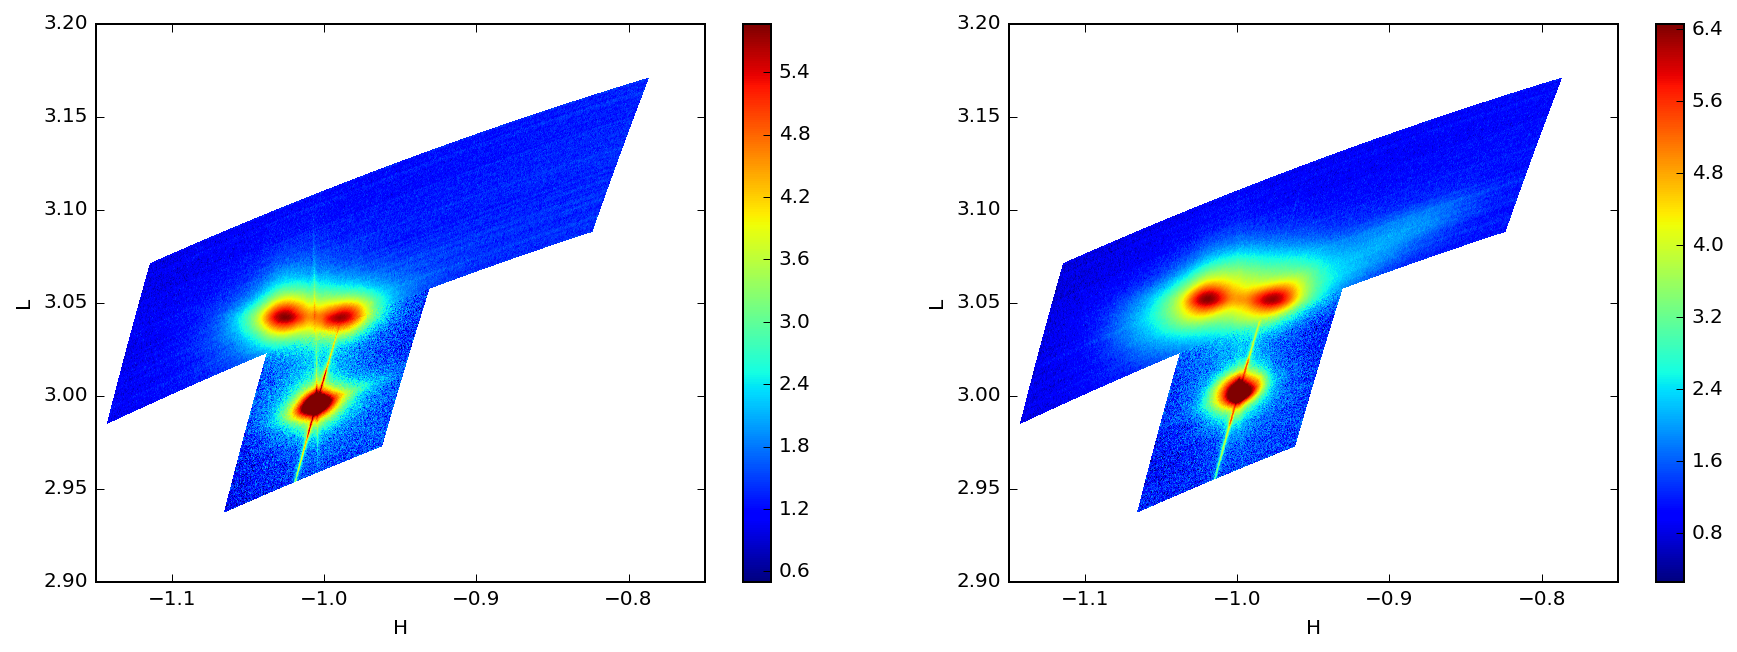

In [34]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
xrd.plt_rsm(_103_2[0],_103_2[1],d2,'sub')
plt.subplot(1,2,2)
xrd.plt_rsm(_103[0],_103[1],d,'sub')

## Profiles

In [43]:
dset = _103[1]

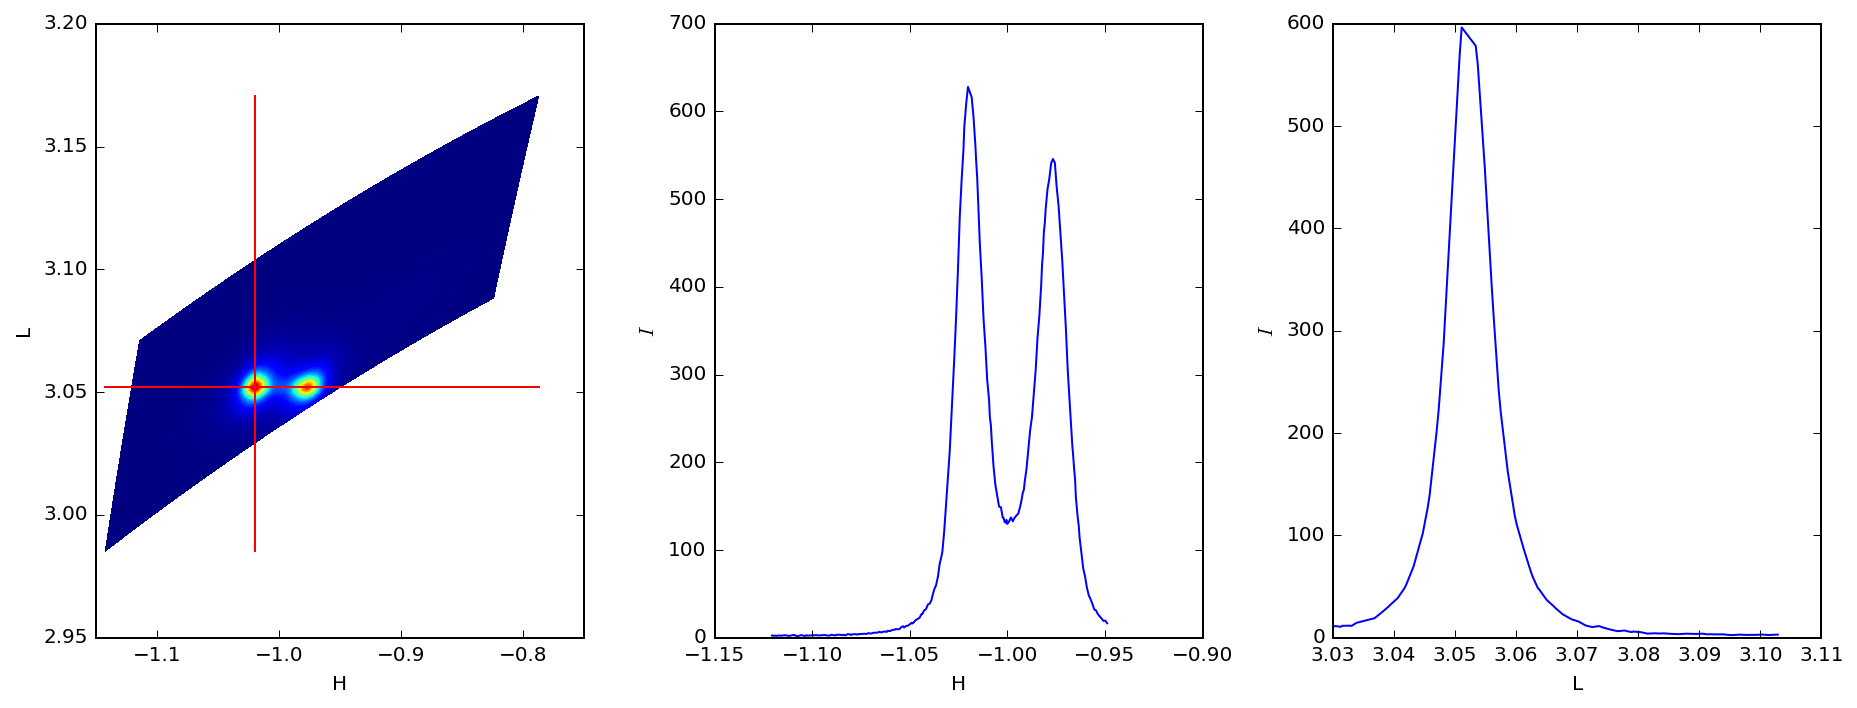

In [44]:
h,l,I = xrd.read_rsm_data(dset,d)
interact(xrd.plt_prof, sample=fixed(dset), d=fixed(d), scale=fixed('lin'), 
         L=FloatSlider(min=l.min(), max=l.max(), step=0.001, value=l[np.where(I==I.max())], continuous_update=False), 
         H=FloatSlider(min=h.min(), max=h.max(), step=0.0001, value=h[np.where(I==I.max())], continuous_update=False), 
         win=fixed(11), polyorder=fixed(3));